In [1]:
# ## install finrl library
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-xy1m3lht
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-xy1m3lht
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-qdijlr6t/pyfolio_efee9d2d5b9f4177aef2f6d0c6df86be
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-qdijlr6t/pyfolio_efee9d2d5b9f4177aef2f6d0c6df86be
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-qdijlr6t/elegantrl_a9cb0c11d2214b6fb1ba7f7ded0573f8
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-qdijlr6t/elegantrl_a9cb0c11d2214b6fb1ba7f7ded0573f8
     |████████████████████████████████| 73 kB 1.8 MB/s 
     |████████████████████████████████| 174 kB 47.9 MB/s 
     |████████████████████████████████| 54.7 MB 34 kB/s 
     |████████████████████████████████| 1.8 MB 36.5 MB/s 
     |███████

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.apps import config
from finrl.neo_finrl.preprocessor.yahoodownloader import YahooDownloader
from finrl.neo_finrl.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.neo_finrl.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.drl_agents.stablebaselines3.models import DRLAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

In [4]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

In [5]:
# from config.py start_date is a string
config.START_DATE

'2009-01-01'

In [6]:
config.END_DATE

'2021-10-31'

In [7]:
IBEX_35 = ["COL.MC","CLNX.MC","MRL.MC","VIS.MC","PHM.MC","SGRE.MC","AMS.MC","FER.MC","ACS.MC","MAP.MC","MTS.MC","SAB.MC","GRF.MC","ENG.MC","ELE.MC","IBE.MC","ITX.MC","CABK.MC","ACX.MC","AENA.MC","REE.MC","SAN.MC","ANA.MC","BKT.MC","FDR.MC","MEL.MC","IAG.MC","BBVA.MC","TEF.MC","NTGY.MC"]
print(IBEX_35)

['COL.MC', 'CLNX.MC', 'MRL.MC', 'VIS.MC', 'PHM.MC', 'SGRE.MC', 'AMS.MC', 'FER.MC', 'ACS.MC', 'MAP.MC', 'MTS.MC', 'SAB.MC', 'GRF.MC', 'ENG.MC', 'ELE.MC', 'IBE.MC', 'ITX.MC', 'CABK.MC', 'ACX.MC', 'AENA.MC', 'REE.MC', 'SAN.MC', 'ANA.MC', 'BKT.MC', 'FDR.MC', 'MEL.MC', 'IAG.MC', 'BBVA.MC', 'TEF.MC', 'NTGY.MC']


In [8]:
df = YahooDownloader(start_date = '2009-01-01',
                     end_date = '2021-10-14',
                     ticker_list = IBEX_35).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,32.990002,33.700001,32.990002,15.898988,732696.0,ACS.MC,4
1,2009-01-02,11.370000,11.950000,11.370000,6.227797,768565.0,ACX.MC,4
2,2009-01-02,88.599998,92.150002,88.599998,54.755966,141137.0,ANA.MC,4
3,2009-01-02,8.320043,8.723555,8.320043,4.605251,31465447.0,BBVA.MC,4
4,2009-01-02,3.988073,4.088396,3.988073,2.548610,740746.0,BKT.MC,4


In [ ]:
df.tail()

,date,open,high,low,close,volume,tic,day
92623,2021-10-13,0.710000,0.714200,0.662000,0.666600,49535977.0,SAB.MC,2
92624,2021-10-13,3.361000,3.378500,3.260500,3.227566,39017776.0,SAN.MC,2
92625,2021-10-13,20.459999,21.290001,20.280001,21.049999,2237096.0,SGRE.MC,2
92626,2021-10-13,4.009500,4.012500,3.961000,3.967000,21103501.0,TEF.MC,2
92627,2021-10-13,55.200001,56.049999,54.599998,55.900002,54020.0,VIS.MC,2


In [ ]:
df.shape

(92628, 8)

In [9]:
df.sort_values(['date','tic']).head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,32.990002,33.700001,32.990002,15.898990,732696.0,ACS.MC,4
1,2009-01-02,11.370000,11.950000,11.370000,6.227797,768565.0,ACX.MC,4
2,2009-01-02,88.599998,92.150002,88.599998,54.755966,141137.0,ANA.MC,4
3,2009-01-02,8.320043,8.723555,8.320043,4.605250,31465447.0,BBVA.MC,4
4,2009-01-02,3.988073,4.088396,3.988073,2.548609,740746.0,BKT.MC,4


In [ ]:
len(df.tic.unique())#FALTAN 5

30

In [ ]:
df.tic.value_counts()

ENG.MC     3269
CABK.MC    3269
FER.MC     3269
REE.MC     3269
MEL.MC     3269
TEF.MC     3269
NTGY.MC    3269
ELE.MC     3269
FDR.MC     3269
ITX.MC     3269
PHM.MC     3269
IBE.MC     3269
ACX.MC     3269
VIS.MC     3269
SGRE.MC    3269
SAB.MC     3269
SAN.MC     3269
BBVA.MC    3269
COL.MC     3269
BKT.MC     3269
MTS.MC     3269
MAP.MC     3269
GRF.MC     3269
ACS.MC     3269
ANA.MC     3269
AMS.MC     2934
IAG.MC     2744
MRL.MC     1867
AENA.MC    1708
CLNX.MC    1650
Name: tic, dtype: int64

In [ ]:
df.describe()

,open,high,low,close,volume,day
count,92628.000000,92628.000000,92628.000000,92628.000000,9.262800e+04,92628.000000
mean,19.833066,20.071526,19.569526,16.616354,1.047040e+07,1.995423
std,24.539437,24.813585,24.240792,22.175215,2.820037e+07,1.408124
min,0.252000,0.262000,0.250000,0.254600,0.000000e+00,0.000000
25%,5.830000,5.908000,5.732375,4.398593,5.735188e+05,1.000000
50%,12.100000,12.234418,11.950000,8.617806,1.644242e+06,2.000000
75%,23.240000,23.500000,22.959999,19.634625,6.464110e+06,3.000000
max,183.000000,184.899994,182.699997,166.293732,9.487686e+08,4.000000


In [ ]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume    float64
tic        object
day         int64
dtype: object

In [11]:
tech_indicators = ['macd',
 'rsi_30',
 'cci_30'
 #'dx_30'
 ]

In [12]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = tech_indicators,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

Successfully added technical indicators
Successfully added turbulence index


In [ ]:
processed.sample(10)

,date,open,high,low,close,volume,tic,day,macd,rsi_30,cci_30,turbulence
42410,2015-08-24,19.875000,20.055000,19.250000,15.946307,4444831.0,FER.MC,0,-0.060362,42.623241,-372.411392,63.449825
8620,2010-05-12,2.201901,2.255650,2.162646,1.600111,14211184.0,SAB.MC,2,-0.046452,44.819157,-98.477829,24.202932
75340,2020-10-15,3.050000,3.096000,2.922000,3.082000,2399058.0,MEL.MC,3,-0.028922,43.963212,-81.837181,45.342063
66445,2019-05-29,0.985119,0.999896,0.977238,0.931573,21497667.0,SAB.MC,2,0.005056,50.508012,-81.111251,43.430166
23137,2012-08-14,3.076000,3.093000,3.033000,2.015092,27368256.0,IBE.MC,1,-0.014333,47.434257,-1.224330,15.565329
57421,2017-12-21,5.366668,5.493168,5.358043,4.616609,50853703.0,SAN.MC,3,0.018564,53.767081,103.029200,18.316327
13674,2011-02-22,26.400000,27.360001,25.530001,19.431173,246170.0,VIS.MC,1,-0.238407,46.772506,-71.716273,20.892308
44227,2015-12-03,79.040001,80.000000,78.330002,64.327011,264617.0,ANA.MC,3,1.076431,61.781292,134.444098,39.653845
47929,2016-07-04,5.800000,5.849000,5.733000,4.728878,1927667.0,BKT.MC,0,-0.142739,41.491427,-101.241905,26.920476
9624,2010-07-07,22.650000,22.860001,22.219999,16.822956,74186.0,VIS.MC,2,0.273510,62.041643,134.441428,48.324047


In [ ]:
processed.to_csv (r'./processed_data.csv',index=False, header=True)

Me he dado cuenta que realmente trabaja con los 25 que si se han mantenido en el IBEX desde 2009, y desde yfinance no se pueden recuperar los ultimos 5 valores del IBEX para conseguir compensar... Unlucky

In [13]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(tech_indicators)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 25, State Space: 126


In [14]:
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 100000, 
    "buy_cost_pct": 0.0001, 
    "sell_cost_pct": 0.0001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": tech_indicators,
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4
}

In [15]:
#validation_window = 400 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)
train_start = '2009-01-01'
train_end = '2019-01-01'
val_test_start = '2019-04-01'
val_test_end = '2021-09-15'

to_train = data_split(processed, train_start, train_end)
to_trade = data_split(processed, val_test_start, val_test_end)

In [16]:
e_train_gym = StockTradingEnv(df = to_train, **env_kwargs)
env_train, _ = e_train_gym.get_sb_env()

In [17]:
agent = DRLAgent(env = env_train)


In [18]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.01,
                    'learning_rate': 0.0005
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2048,
                    "learning_rate": 0.00025,
                    "batch_size": 64
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 100_000,
                      "learning_rate": 0.000005,
                      "batch_size": 64
                    }


timesteps_dict = {'a2c' : 10_000, 
                 'ppo' : 10_000, 
                 'ddpg' : 10_000
                 }

**MODELO A2C**

In [23]:
model_a2c = agent.get_model("a2c", model_kwargs=A2C_model_kwargs)

trained_a2c = agent.train_model(model = model_a2c,
                                tb_log_name = 'a2c',
                                total_timesteps = 10000)

{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0005}
Using cpu device
Logging to tensorboard_log/a2c/a2c_2
----------------------------------------
| time/                 |              |
|    fps                | 100          |
|    iterations         | 100          |
|    time_elapsed       | 4            |
|    total_timesteps    | 500          |
| train/                |              |
|    entropy_loss       | -35.7        |
|    explained_variance | -2.62        |
|    learning_rate      | 0.0005       |
|    n_updates          | 99           |
|    policy_loss        | 7.51         |
|    reward             | -0.008975518 |
|    std                | 1.01         |
|    value_loss         | 0.074        |
----------------------------------------
-----------------------------------------
| time/                 |               |
|    fps                | 101           |
|    iterations         | 200           |
|    time_elapsed       | 9             |
|    total_timesteps  

**MODELO PPO**

In [ ]:
model_ppo = agent.get_model("ppo", model_kwargs=PPO_model_kwargs)

trained_ppo = agent.train_model(model = model_ppo,
                                tb_log_name = 'ppo',
                                total_timesteps = 10000)

{'ent_coef': 0.01, 'n_steps': 2048, 'learning_rate': 0.00025, 'batch_size': 64}
Using cpu device
Logging to tensorboard_log/ppo/ppo_1
-------------------------------------
| time/              |              |
|    fps             | 102          |
|    iterations      | 1            |
|    time_elapsed    | 19           |
|    total_timesteps | 2048         |
| train/             |              |
|    reward          | -0.053788614 |
-------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 99          |
|    iterations           | 2           |
|    time_elapsed         | 41          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.023290083 |
|    clip_fraction        | 0.269       |
|    clip_range           | 0.2         |
|    entropy_loss         | -35.5       |
|    explained_variance   | -0.498      |
|    learning_rate  

**MODELO DDPG**

In [ ]:
model_ddpg = agent.get_model("ddpg", model_kwargs=DDPG_model_kwargs)

trained_ddpg = agent.train_model(model = model_ddpg,
                                tb_log_name = 'ddpg',
                                total_timesteps = 10000)

{'buffer_size': 100000, 'learning_rate': 5e-06, 'batch_size': 64}
Using cpu device
Logging to tensorboard_log/ddpg/ddpg_3
-----------------------------------
| time/              |            |
|    episodes        | 4          |
|    fps             | 41         |
|    time_elapsed    | 243        |
|    total_timesteps | 10220      |
| train/             |            |
|    actor_loss      | 30.9       |
|    critic_loss     | 2.87       |
|    learning_rate   | 5e-06      |
|    n_updates       | 7665       |
|    reward          | 0.20834085 |
-----------------------------------


**TRADING TIME**


In [20]:
e_trade_gym = StockTradingEnv(df = to_trade, **env_kwargs)

Nota: en teoria ambos deberian mostrar un Sharpe ratio al final del periodo de entrenamiento, pero solo DDPG lo muestra, no sabemos a priori que resultados van a dar

In [24]:
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_a2c, 
    environment = e_trade_gym)

hit end!


In [25]:
df_account_value_a2c.tail()

,date,account_value
625,2021-09-08,121853.246632
626,2021-09-09,122295.990368
627,2021-09-10,121293.310006
628,2021-09-13,123607.488058
629,2021-09-14,123966.600799


In [ ]:
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_ppo, 
    environment = e_trade_gym)

hit end!


In [ ]:
df_account_value_ppo.tail()

,date,account_value
625,2021-09-08,127516.808843
626,2021-09-09,127012.565375
627,2021-09-10,125962.829083
628,2021-09-13,127889.718231
629,2021-09-14,126435.632084


In [ ]:
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_ddpg, 
    environment = e_trade_gym)

hit end!


In [ ]:
df_account_value_ddpg.head()

,date,account_value
0,2019-04-01,100000.000000
1,2019-04-02,100316.560306
2,2019-04-03,100546.011709
3,2019-04-04,101360.081740
4,2019-04-05,101118.015335


In [ ]:
df_account_value_ddpg.tail()

,date,account_value
625,2021-09-08,118203.549329
626,2021-09-09,117253.756898
627,2021-09-10,116178.011357
628,2021-09-13,117140.743664
629,2021-09-14,116884.240787


In [ ]:
df_actions_a2c.head(690)

,ACS.MC,ACX.MC,ANA.MC,BBVA.MC,BKT.MC,CABK.MC,COL.MC,ELE.MC,ENG.MC,FDR.MC,FER.MC,GRF.MC,IBE.MC,ITX.MC,MAP.MC,MEL.MC,MTS.MC,NTGY.MC,PHM.MC,REE.MC,SAB.MC,SAN.MC,SGRE.MC,TEF.MC,VIS.MC
date,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-01,0,0,0,70,0,100,0,0,55,100,0,0,62,90,0,100,100,0,100,0,0,0,72,100,14
2019-04-02,63,0,39,68,100,100,100,100,0,93,0,52,-12,100,100,-100,89,0,100,0,22,0,100,30,100
2019-04-03,52,0,-39,37,-23,3,10,-94,-55,-76,0,100,48,-100,89,0,73,0,-41,0,-22,27,100,-71,-84
2019-04-04,-1,0,55,100,-34,100,100,53,0,5,0,78,10,100,40,0,-64,100,100,0,26,100,-100,-59,-30
2019-04-05,-36,100,-55,62,14,100,-82,69,0,100,100,100,-12,-50,-100,0,-79,-5,100,0,100,-100,-73,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-07,0,0,0,-2,0,10,0,0,0,0,0,0,0,0,-8,0,0,0,0,0,0,0,0,0,0
2021-09-08,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,-25,0,0,0,0,0,0,0,11
2021-09-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0


In [26]:
df_account_value_a2c.to_csv (r'./a2c_account.csv',index=False, header=True)


In [ ]:
df_account_value_ppo.to_csv (r'./ppo_account.csv',index=False, header=True)

In [ ]:
df_account_value_ddpg.to_csv (r'./ddpg_account.csv',index=False, header=True)

In [ ]:
ensemble_account = pd.read_csv('ensemble_account.csv')

In [ ]:
ensemble_account.tail()

,Unnamed: 0,account_value,date,daily_return,datadate
625,625,136465.311688,2021-09-08,-0.009069,2021-09-08
626,626,135761.321136,2021-09-09,-0.005159,2021-09-09
627,627,134492.191316,2021-09-10,-0.009348,2021-09-10
628,628,136577.253747,2021-09-13,0.015503,2021-09-13
629,629,135715.316738,2021-09-14,-0.006311,2021-09-14


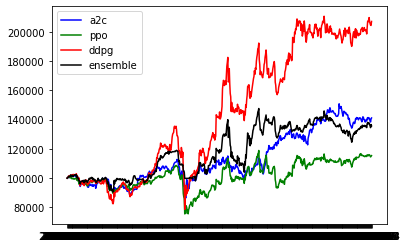

In [ ]:
%matplotlib inline
plt.plot_date(df_account_value_a2c.date, df_account_value_a2c.account_value,'b-',label='a2c')
plt.plot_date(df_account_value_ppo.date, df_account_value_ppo.account_value,'g-',label='ppo')
plt.plot_date(df_account_value_ddpg.date, df_account_value_ddpg.account_value,'r-',label='ddpg')
plt.plot_date(ensemble_account.date, ensemble_account.account_value,'k-',label='ensemble')
plt.locator_params(axis="x", nbins=4)
plt.legend(loc="upper left")

### **BACKTEST**

**A2C**

In [27]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_a2c)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

==============Get Backtest Results===========
Annual return          0.089737
Cumulative returns     0.239666
Annual volatility      0.277229
Sharpe ratio           0.451361
Calmar ratio           0.243941
Stability              0.260522
Max drawdown          -0.367866
Omega ratio            1.093419
Sortino ratio          0.608617
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.970232
Daily value at risk   -0.034431
dtype: float64


In [28]:
baseline_df = get_baseline(
        ticker="^IBEX", 
        start = '2019-01-01',
        end = '2021-09-14')

stats = backtest_stats(baseline_df, value_col_name = 'close')

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (691, 8)
Annual return          0.011240
Cumulative returns     0.031123
Annual volatility      0.232230
Sharpe ratio           0.165781
Calmar ratio           0.028503
Stability              0.096363
Max drawdown          -0.394343
Omega ratio            1.033211
Sortino ratio          0.221749
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.926518
Daily value at risk   -0.029105
dtype: float64


In [29]:
backtest_plot(df_account_value_a2c, 
             baseline_ticker = '^IBEX', 
             baseline_start = df_account_value_a2c.loc[0,'date'],
             baseline_end = df_account_value_a2c.loc[len(df_account_value_a2c)-1,'date'])

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (628, 8)


Start date,2019-04-01
End date,2021-09-14
Total months,30
,Backtest
Annual return,8.974%
Cumulative returns,23.967%
Annual volatility,27.723%
Sharpe ratio,0.45
Calmar ratio,0.24
Stability,0.26
Max drawdown,-36.787%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,36.79,2020-02-19,2020-03-16,2021-01-08,233
1,10.68,2021-04-29,2021-07-19,NaT,NaN
2,9.31,2019-04-10,2019-08-06,2020-01-15,201
3,6.36,2021-02-19,2021-03-05,2021-03-30,28
4,4.56,2021-01-26,2021-01-29,2021-02-08,10


**PPO**

In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_ppo)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

==============Get Backtest Results===========
Annual return          0.098368
Cumulative returns     0.264356
Annual volatility      0.216387
Sharpe ratio           0.544942
Calmar ratio           0.259216
Stability              0.541505
Max drawdown          -0.379481
Omega ratio            1.113410
Sortino ratio          0.709986
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.016974
Daily value at risk   -0.026794
dtype: float64


In [ ]:
baseline_df = get_baseline(
        ticker="^IBEX", 
        start = '2019-01-01',
        end = '2021-09-14')

stats = backtest_stats(baseline_df, value_col_name = 'close')

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (691, 8)
Annual return          0.011240
Cumulative returns     0.031123
Annual volatility      0.232230
Sharpe ratio           0.165781
Calmar ratio           0.028503
Stability              0.096363
Max drawdown          -0.394343
Omega ratio            1.033211
Sortino ratio          0.221749
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.926518
Daily value at risk   -0.029105
dtype: float64


In [ ]:
backtest_plot(df_account_value_ppo, 
             baseline_ticker = '^IBEX', 
             baseline_start = df_account_value_ppo.loc[0,'date'],
             baseline_end = df_account_value_ppo.loc[len(df_account_value_ppo)-1,'date'])

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (628, 8)


Start date,2019-04-01
End date,2021-09-14
Total months,30
,Backtest
Annual return,9.837%
Cumulative returns,26.436%
Annual volatility,21.639%
Sharpe ratio,0.54
Calmar ratio,0.26
Stability,0.54
Max drawdown,-37.948%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,37.95,2020-02-17,2020-03-16,2021-03-12,280
1,8.84,2019-07-24,2019-08-15,2019-12-06,98
2,8.39,2021-06-14,2021-07-19,NaT,NaN
3,7.27,2019-04-30,2019-05-13,2019-07-16,56
4,2.88,2021-05-10,2021-05-13,2021-06-11,25


**DDPG**

In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_ddpg)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+config.RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

==============Get Backtest Results===========
Annual return          0.064394
Cumulative returns     0.168842
Annual volatility      0.205788
Sharpe ratio           0.407046
Calmar ratio           0.228628
Stability              0.574981
Max drawdown          -0.281654
Omega ratio            1.079676
Sortino ratio          0.568819
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.959514
Daily value at risk   -0.025594
dtype: float64


In [ ]:
baseline_df = get_baseline(
        ticker="^IBEX", 
        start = '2019-01-01',
        end = '2021-09-14')

stats = backtest_stats(baseline_df, value_col_name = 'close')

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (691, 8)
Annual return          0.011240
Cumulative returns     0.031123
Annual volatility      0.232230
Sharpe ratio           0.165781
Calmar ratio           0.028503
Stability              0.096363
Max drawdown          -0.394343
Omega ratio            1.033211
Sortino ratio          0.221749
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.926518
Daily value at risk   -0.029105
dtype: float64


In [ ]:
backtest_plot(df_account_value_ddpg, 
             baseline_ticker = '^IBEX', 
             baseline_start = df_account_value_ddpg.loc[0,'date'],
             baseline_end = df_account_value_ddpg.loc[len(df_account_value_ddpg)-1,'date'])

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (628, 8)


Start date,2019-04-01
End date,2021-09-14
Total months,30
,Backtest
Annual return,6.439%
Cumulative returns,16.884%
Annual volatility,20.579%
Sharpe ratio,0.41
Calmar ratio,0.23
Stability,0.57
Max drawdown,-28.165%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,28.17,2019-04-16,2020-03-12,2020-08-11,346
1,11.74,2020-08-12,2020-10-28,2020-11-13,68
2,6.20,2021-06-25,2021-07-19,2021-08-02,27
3,5.74,2021-01-14,2021-02-23,2021-03-30,54
4,3.79,2021-05-10,2021-06-18,2021-06-25,35
